needed:  13.370533705337053
closest:  [14.10674107  0.24444444]


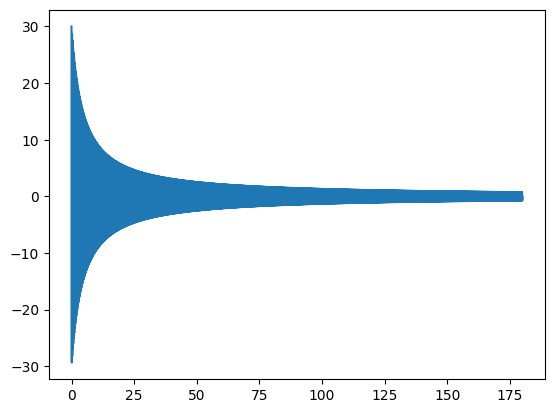

: 

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt



def diferential_equation_air(t, state):
  theta, omega = state
  
  mass = 1000
  g = -9.8
  l = 0.1
  Cd = 0.5
  rho = 1.24
  A = 1
  
  
  alpha = (mass*g*np.sin(theta) - 0.5*rho*Cd*A*omega**2 * np.sign(omega))/(mass*l**2)
  return [omega, alpha]


def diferential_equation_spring(t, state):

  theta, omega = state
  mass = 1
  g = -9.8
  l = 1
  k = 2e7
  
  alpha = (mass*g*np.sin(theta) - k*theta)/(mass*l**2)
  return [omega, alpha]

t0 = 0
tf = 60*3
state0 = [np.pi/6, 0]

solution = solve_ivp(diferential_equation_air, [t0, tf], state0, t_eval=np.linspace(t0, tf, 100000))

# solution_spring = solve_ivp(diferential_equation_spring, [t0, tf], state0, t_eval=np.linspace(t0, tf, 10000))

# find when amplitude is half of the initial amplitude
last_half = 0
for i in range(len(solution.y[0])):
  if solution.y[0][i] >= 0.5*state0[0]:
    last = i
  
print("needed: ", 3*solution.t[last])
needed_t = 3*solution.t[last]

#find closest max near 3*amplitude_at
#2d
results = np.array([]).reshape(0, 2)
for i in np.linspace(0.2,0.4, 10):
  last_half = 0
  for ii in range(len(solution.y[0])):
    if solution.y[0][ii] >= i*state0[0]:
      last = ii
    
  results = np.append(results, [[solution.t[last], i]], axis=0)
  
#find closest to needed_t and print
closest = np.argmin(np.abs(results[:,0] - needed_t))
print("closest: ", results[closest])



plt.plot(solution.t, np.rad2deg(solution.y[0]))
# plt.plot(solution_spring.t, np.rad2deg(solution_spring.y[0]))
plt.show()